In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [5]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


# Visualization

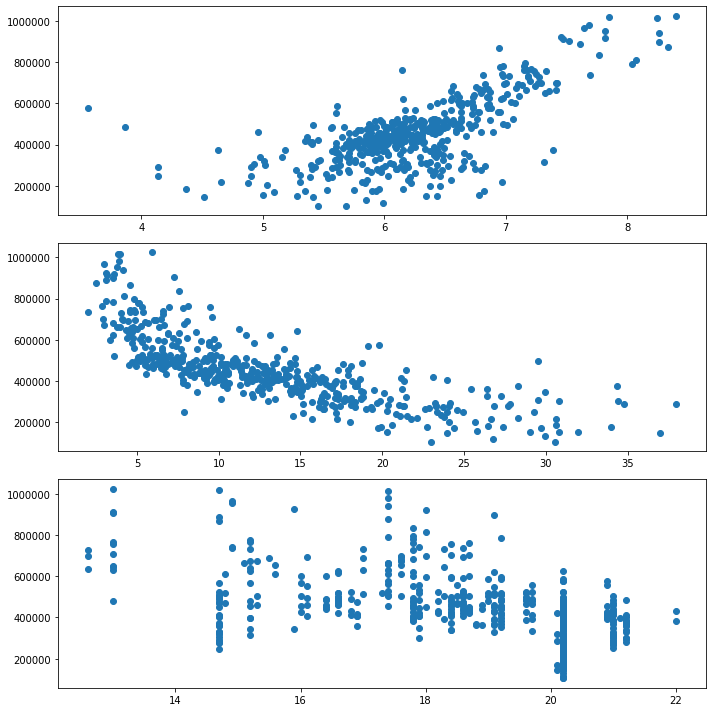

In [20]:
fig,axes = plt.subplots(figsize=(10,10),nrows=3,ncols=1)
col = 0
for ca in axes:
    ca.scatter(df.iloc[:,col],df['MEDV'])
    col+=1
    
plt.tight_layout()

# lets check the correlation between feature 

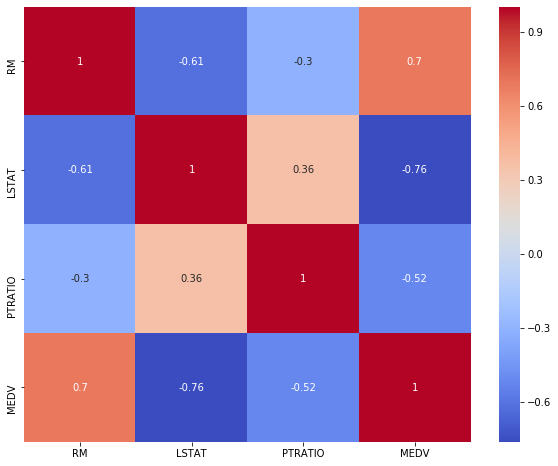

In [27]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

In [28]:
## features are not correlated with each other, sounds good....

# Spliting up data

In [37]:
X = df.drop(['MEDV'],axis=1).values
y = df['MEDV'].values


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

# Lets Apply Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Linear Regression

In [42]:
reg1 = LinearRegression()
reg1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_predict1 = reg1.predict(X_test)

In [49]:
print('r2 score:',r2_score(y_test,y_predict1),'for Linear Regression')

r2 score: 0.726070895410086 for Linear Regression


In [81]:
score1 = r2_score(y_test,y_predict1)

# Support Vector Regression

In [75]:
reg2 = SVR(kernel='poly',degree=4)
reg2.fit(X_train,y_train)

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=4, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
y_predict2 = reg2.predict(X_test)

In [77]:
print('r2 score:',r2_score(y_test,y_predict2),'for Support Vector Regression')

r2 score: 0.8193357573258676 for Support Vector Regression


In [82]:
score2 = r2_score(y_test,y_predict2)

# Decision Tree

In [78]:
reg3 = DecisionTreeRegressor()
reg3.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [79]:
y_predict3 = reg3.predict(X_test)

In [98]:
print('r2 score:',r2_score(y_test,y_predict3),'for Support Vector Regression')

r2 score: 0.5029754309447099 for Support Vector Regression


In [99]:
score3 = r2_score(y_test,y_predict3)

# conclusion 

:

In [94]:
data = ({'Linear Regression': score1,
            'Support Vector Regression': score2,
            'Decision Tree': score3})

In [97]:
print('The overall R2_scores are :')
data

The overall R2_scores are :


{'Linear Regression': 0.726070895410086,
 'Support Vector Regression': 0.8193357573258676,
 'Decision Tree': 0.5029754309447099}